# Data Science Intern @Lets Grow More

Author: Nikita Kumbhar.

Task  : Prediction using Decision Tree  Algorithm | Dataset : http://archive.ics.uci.edu/ml/datasets/Iris

# Importing library

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Feature Engineering

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

<AxesSubplot:ylabel='species'>

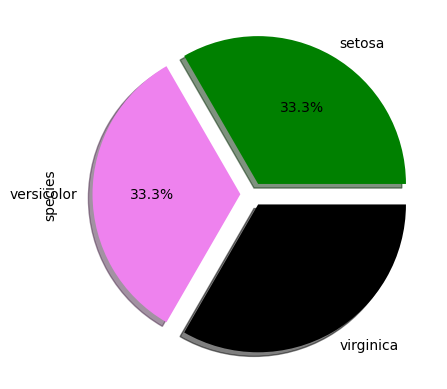

In [9]:
# Pie plot to show the overall types of Iris classifications
colors = ['green','violet','Black']
df['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

<AxesSubplot:>

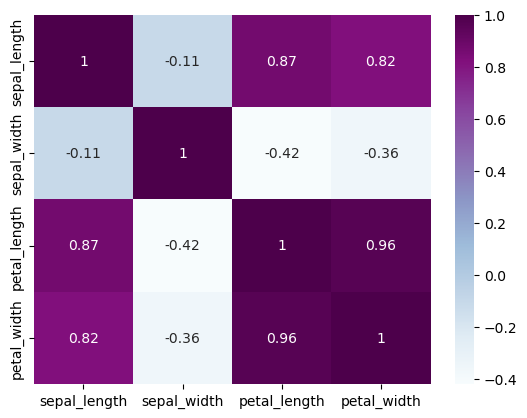

In [10]:
## Heat Map for Data
sns.heatmap(df.corr(), annot=True, cmap="BuPu")

In [11]:
from sklearn.model_selection import train_test_split
#train=70
#test=30
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [12]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

sc_model= round(model.score(x_test, y_test) * 100 , 2)

sc_dt=print("Accuracy: ", str(sc_model) , "%")

Accuracy:  97.78 %


In [13]:
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.25, 'gini = 

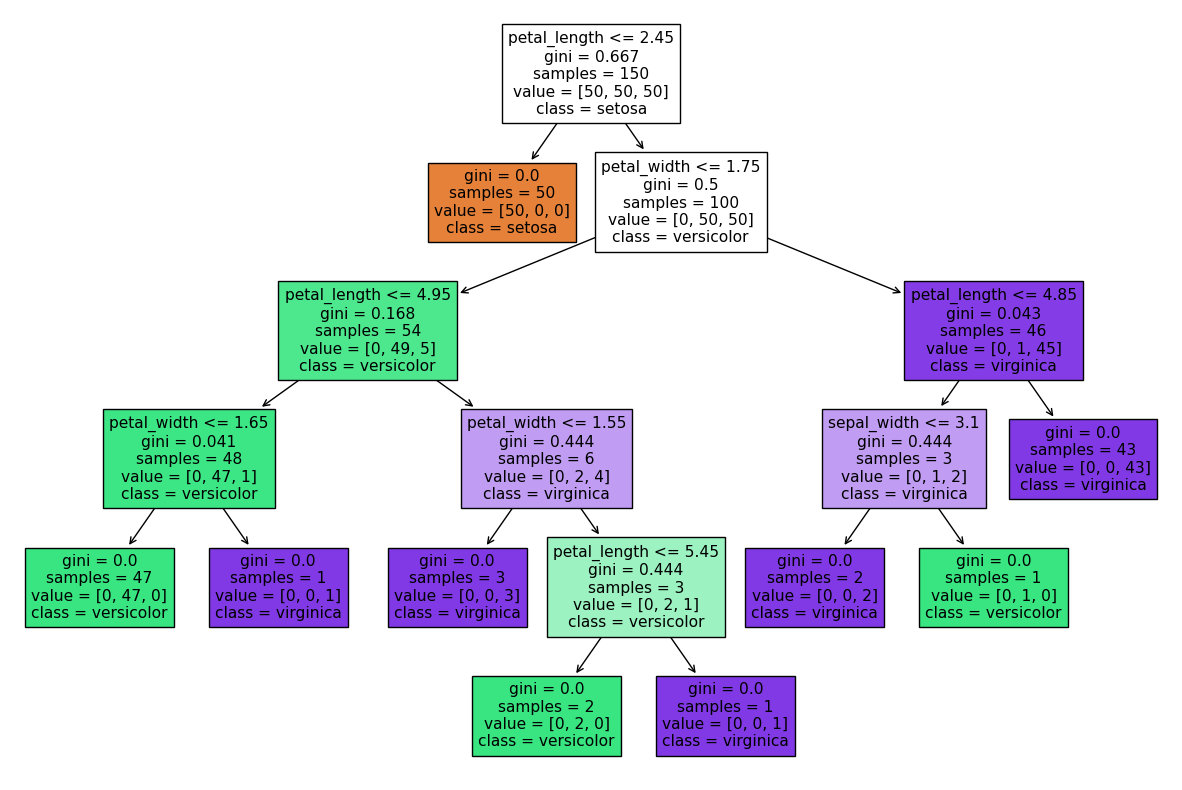

In [14]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
class_name= df.species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

# HyperParameter tunning

In [15]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':[4,5,6,7]}

In [16]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [17]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_split': 2}

In [18]:
grid_search_cv.best_score_

0.9523809523809522

# Building tree using the best parameters

In [19]:
model=DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

In [20]:
pred=model.predict(x_test)

In [21]:
#Checking the accuracy of the model
score=accuracy_score(y_test,pred)
print("Accuracy of Model:",score)

Accuracy of Model: 0.9777777777777777


In [22]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test,cmap='BuPu',colorbar=True)

Decision Tree Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 97.78%


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


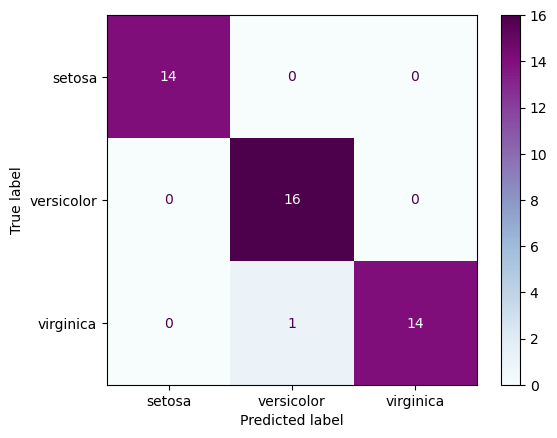

In [23]:
print('Decision Tree Classifier')
report(model)
print(f'Accuracy: {round(score*100,2)}%')

[Text(0.4, 0.875, 'petal_length <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [36, 34, 35]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal_width <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 34, 35]\nclass = virginica'),
 Text(0.4, 0.375, 'petal_length <= 5.35\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.108\nsamples = 35\nvalue = [0, 33, 2]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica')]

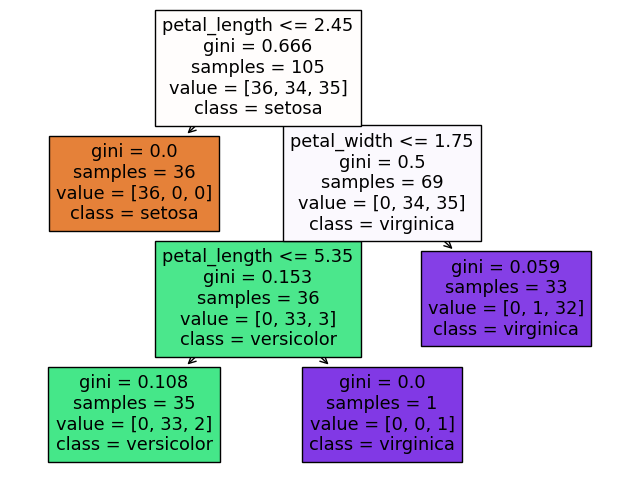

In [24]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
class_name= df.species.unique()
plt.figure(figsize=(8,6))
tree.plot_tree(model, filled = True, feature_names = feature_name, class_names= class_name)

In [25]:
import numpy as np
input_data=(6.0,3.6,2.6,1.2)

 #changing the input data to a numpy array 
input_data_as_nparray = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance 
input_data_reshaped = input_data_as_nparray.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("The category is",prediction) 

The category is ['versicolor']


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
